In [38]:
import cv2
from pytube import YouTube
import numpy as np
import matplotlib.pyplot as plt

In [39]:
# Ruta del video
#output = ".../examen_3_camilo_velez/output"

video_path = 'y2mate.com - 5 Second Timer_1080p.mp4'  # Reemplaza 'ruta_del_video.mp4' con la ruta de tu archivo de video

# Abre el video
cap = cv2.VideoCapture(video_path)

# Comprueba si el video se ha abierto correctamente
if not cap.isOpened():
    print("No se pudo abrir el video.")
    exit()

# Crea la matriz H para almacenar las imágenes
H = np.zeros((240000, 30), dtype=np.uint8)  # Matriz de 240,000x30 para almacenar imágenes en escala de grises

# Captura 30 imágenes en escala de grises y las almacena en H
capturas_realizadas = 0
while capturas_realizadas < 30:
    ret, frame = cap.read()

    if not ret:
        break

    # Redimensiona la imagen a 400x600
    frame = cv2.resize(frame, (600, 400))

    # Convierte la imagen a escala de grises
    frame_gris = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Almacena la imagen en la matriz H
    H[:, capturas_realizadas] = frame_gris.flatten()

    capturas_realizadas += 1

# Cierra el video
cap.release()

print("Se han realizado 30 capturas en escala de grises y se han almacenado en la matriz H.")


Se han realizado 30 capturas en escala de grises y se han almacenado en la matriz H.


In [40]:
H_mean = np.mean(H, axis=0, keepdims=True)

A = H - H_mean

In [41]:
cov = A.T@A

eigenvalues, eigenvectors  = np.linalg.eig(cov)

vector_AAt = H@eigenvectors

idx = eigenvalues.argsort()[::-1]
eigenvalues = eigenvalues[idx]
eigenvectors = vector_AAt[:, idx]


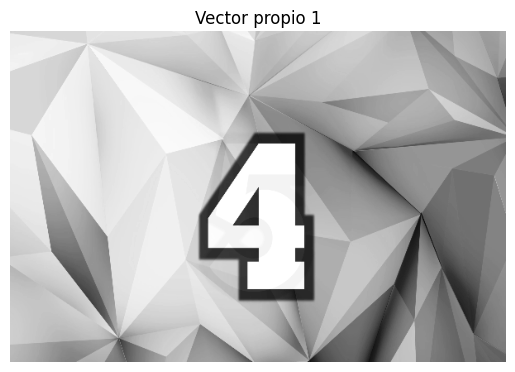

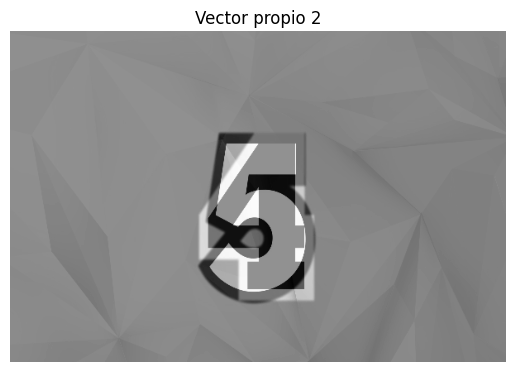

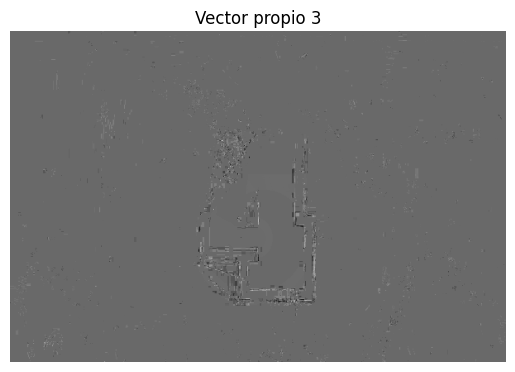

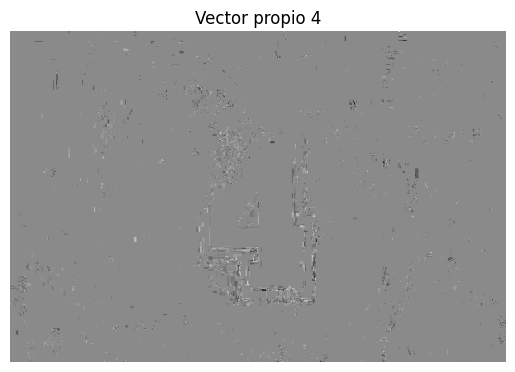

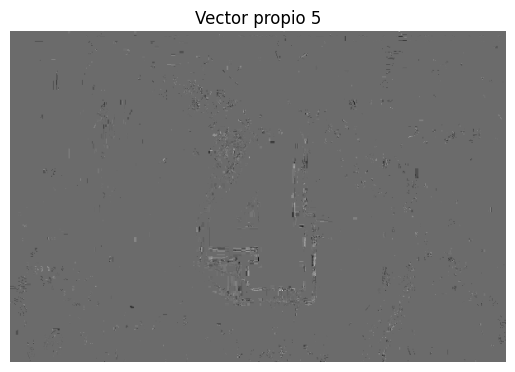

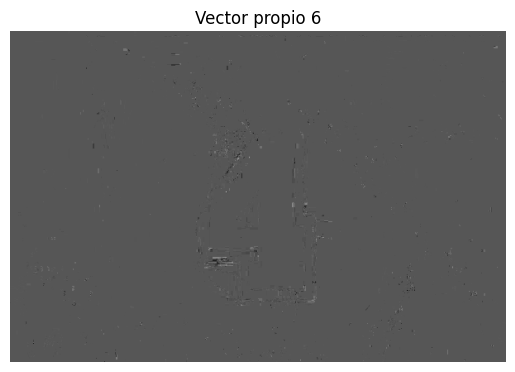

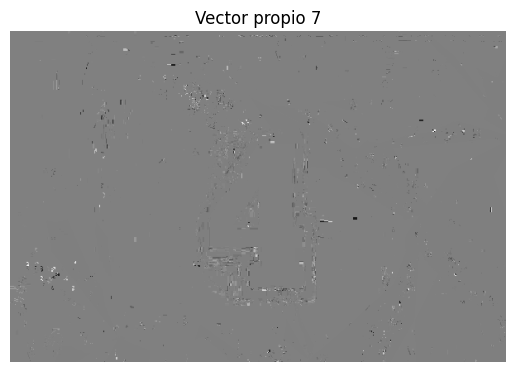

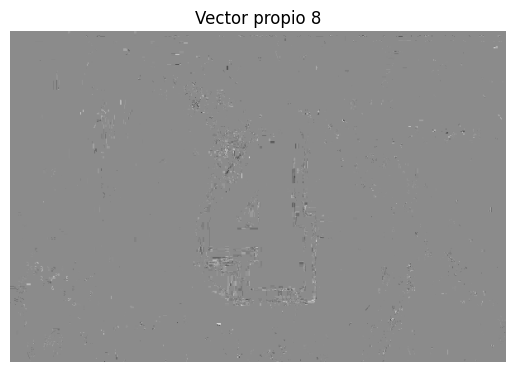

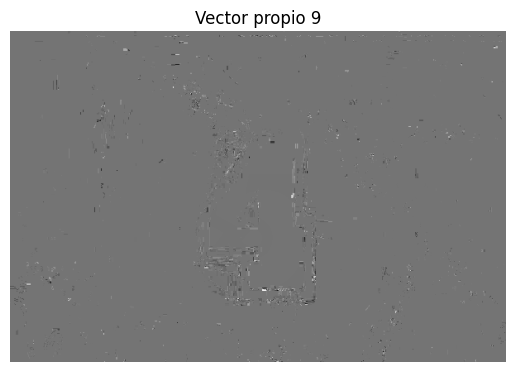

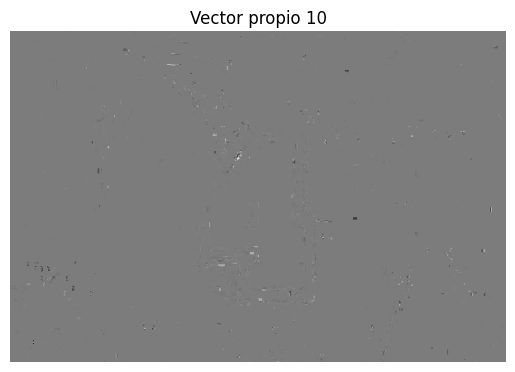

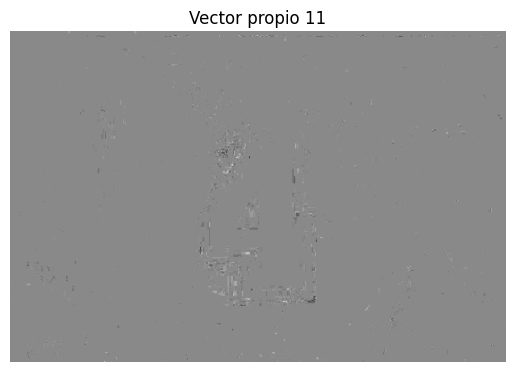

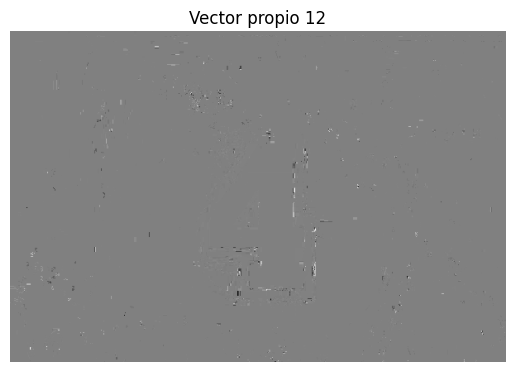

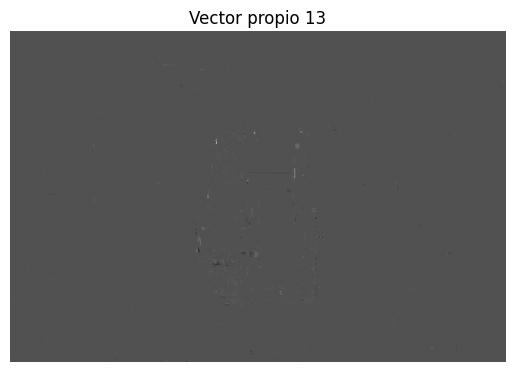

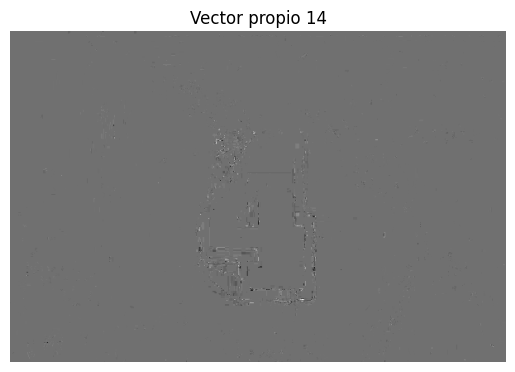

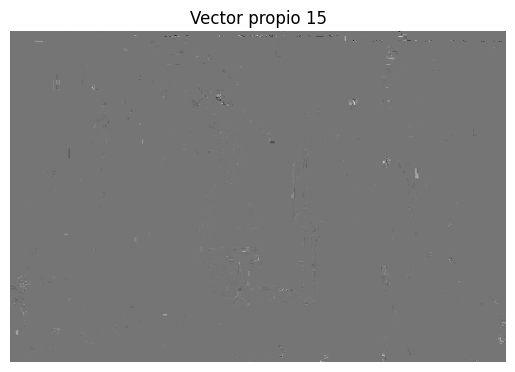

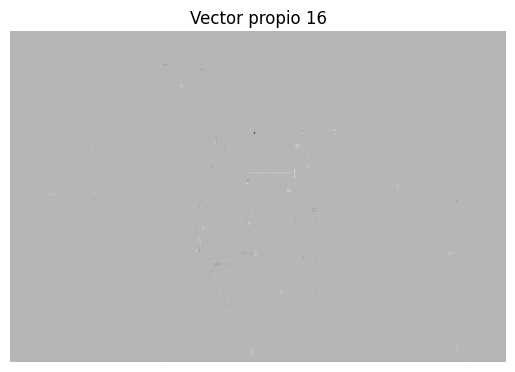

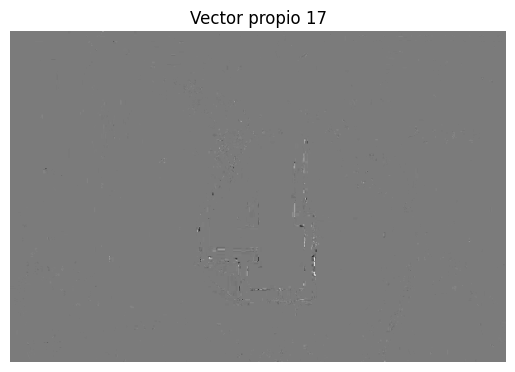

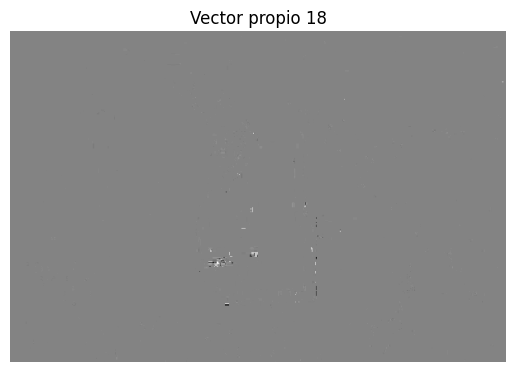

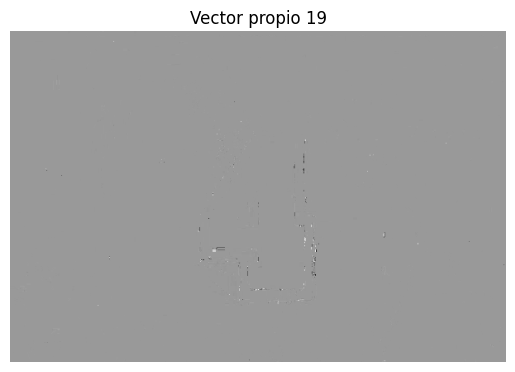

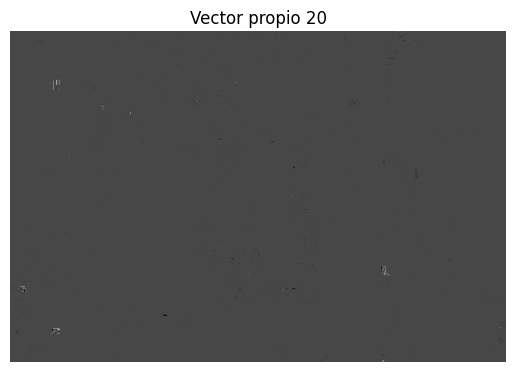

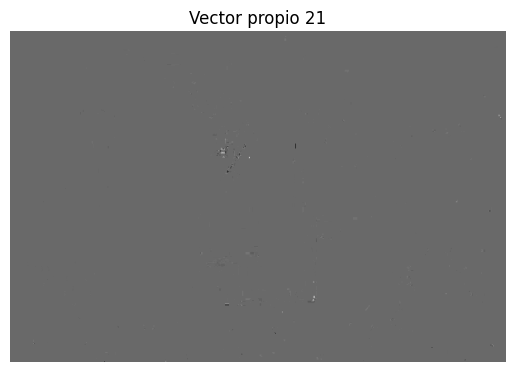

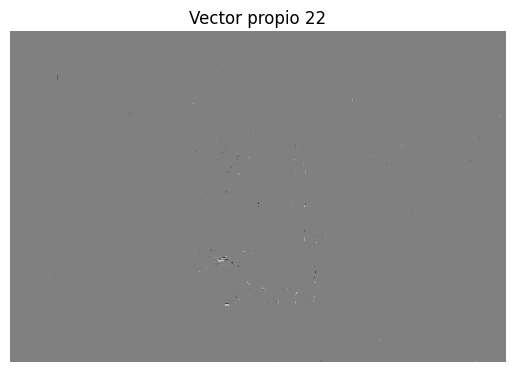

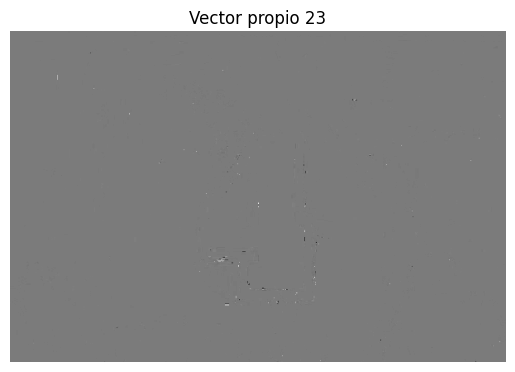

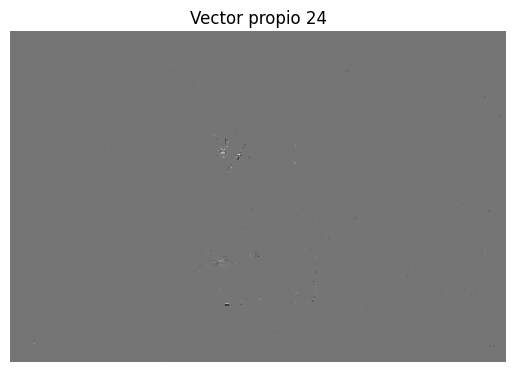

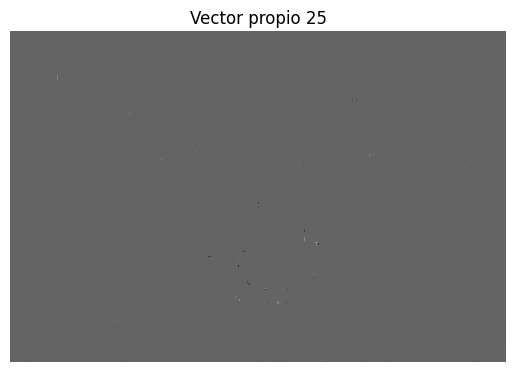

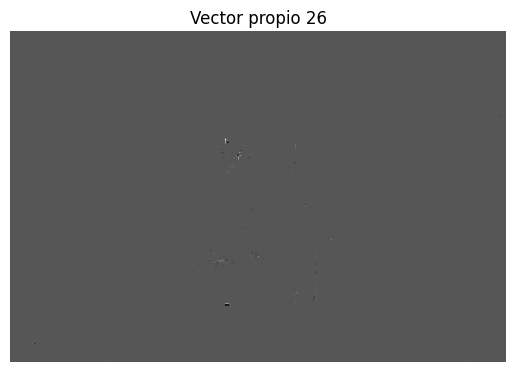

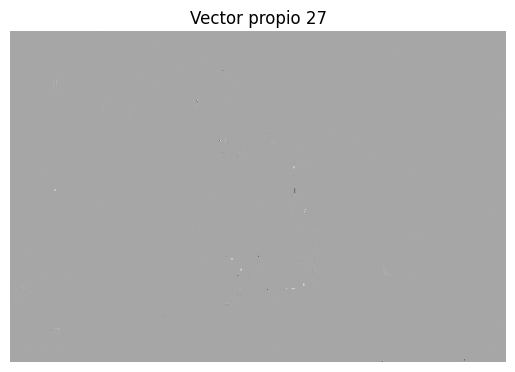

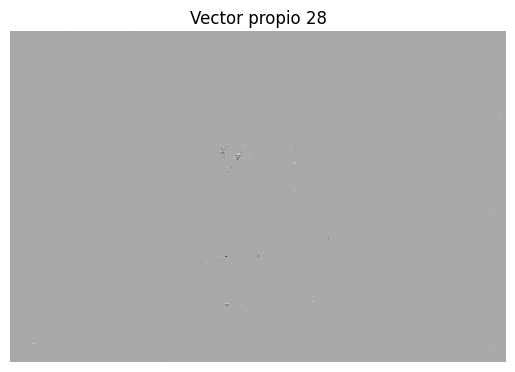

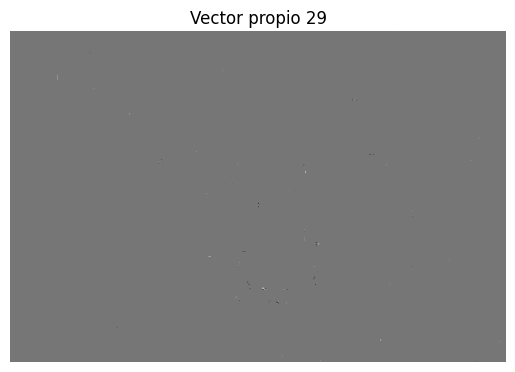

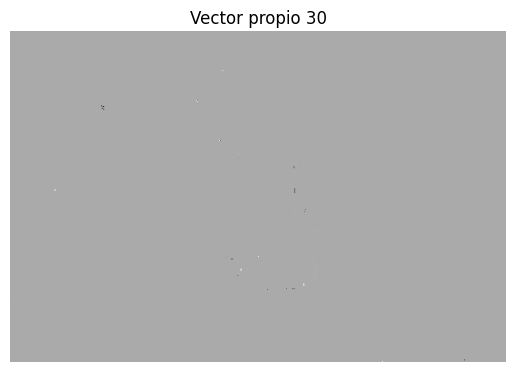

In [47]:
def generate_eigenvector_images(eigenvectors, resolution=(400, 600)):
    num_eigenvectors = eigenvectors.shape[1]

    for i in range(num_eigenvectors):
        # Convierte el vector propio en una matriz de imagen
        eigenvector_image = eigenvectors[:, i].reshape(resolution)

        # Normaliza la matriz de imagen para que los valores estén entre 0 y 255
        eigenvector_image = cv2.normalize(eigenvector_image, None, 0, 255, cv2.NORM_MINMAX)

        # Convierte la matriz de imagen en escala de grises
        eigenvector_image = cv2.convertScaleAbs(eigenvector_image)

        plt.figure()
        plt.imshow(eigenvector_image, cmap="gray")
        plt.title(f"Vector propio {i + 1}")
        plt.axis("off")
        plt.show()

# Llamar a la función con tus vectores propios
generate_eigenvector_images(eigenvectors)
